In [ ]:
import pandas as pd #importing pandas for data processing ,handling and exploring structured data
import numpy as np #importing numpy for numerical computing of large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt #importing matplotlib.pyplot for creating static, animated, and interactive visualizations
import seaborn as sns #importing seaborn for data visualization

In [ ]:
df = pd.read_excel('Data_Train.xlsx') #loading the data set
df.head() #Looking at the first five rows of data set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape #number of rows and columns in the data set

(10683, 11)

In [ ]:
df.info() # lookings at the datatypes and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.columns # Looking at the names of all the columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
# droping the unnecessary columns
drop_columns = [ 'Route','Dep_Time', 'Arrival_Time']
df1 = df.drop(drop_columns,axis=1)
df1.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,No info,13302


In [ ]:
# Calculating the frequency of each unique value in Additional_Info coloumn
# and calculating the percentaga of each value relative to the total number of rows in the DataFrame df1
df1.Additional_Info.value_counts().map(lambda x:(x/len(df))*100)

No info                         78.114762
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
1 Short layover                  0.009361
Red-eye flight                   0.009361
2 Long layover                   0.009361
Name: Additional_Info, dtype: float64

In [ ]:
# If we look at the percentages of categories in variable Additional_Info, 'no info' category has almost 79% of data and as most of the data is 'no info', this column is no  more helpful for analysis

In [ ]:
df1 = df1.drop('Additional_Info',axis=1)
df1.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302


In [ ]:
# check for nulls in the data set

In [ ]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [ ]:
# Filling the missing values in the Total_stops column with the most frequent ones

In [ ]:
df1.Total_Stops = df1.Total_Stops.fillna(df1.Total_Stops.mode()[0])

In [ ]:
# Checking the number of missing values in each column of the data frame

In [ ]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [ ]:
# Converting duration column values which is in hours into number of minutes

In [ ]:
df1[['hours','minutes']] = df1.Duration.str.split(expand =True)
df1.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,hours,minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897,2h,50m
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662,7h,25m
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882,19h,None
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218,5h,25m
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302,4h,45m


In [ ]:
# Coverting the values in hours column from strings to integers by removing the last character

In [ ]:
df1.hours = df1.hours.map(lambda x:int(x[:-1]))

In [ ]:
# Filling any missing values in minutes column with 0m

In [ ]:
df1.minutes = df1.minutes.fillna('0m')

In [ ]:
# Coverting the values in minutes column from strings to integers by removing the last character

In [ ]:
df1.minutes = df1.minutes.map(lambda x:int(x[:-1]))

In [ ]:
# Creating a new cloumn duration_mins for total duration in minutes

In [ ]:
df1['duration_mins'] = df1.hours*60 + df1.minutes
df1.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,hours,minutes,duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897,2,50,170
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662,7,25,445
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882,19,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218,5,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302,4,45,285


In [ ]:
# Extracting month and day from data frame and creating a new columns Day and Month
# We are not extracting year as all the data is from year 2019. Even if 'year' is extracted, every entry will be 2019.

In [ ]:
df1['Day'] = df1.	Date_of_Journey.map(lambda x:int(x[0:x.index('/')]))
df1['Month'] = df1.Date_of_Journey.map(lambda x:int(x[x.index('/')+1:x.index('/')+3]))

In [ ]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,hours,minutes,duration_mins,Day,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897,2,50,170,24,3
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662,7,25,445,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882,19,0,1140,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218,5,25,325,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302,4,45,285,1,3


In [ ]:
#Checking for any anamolies in Data

In [ ]:
df1.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
#Since New Delhi and Delhi are same destinations we are converting 'New Delhi' into 'Delhi

In [ ]:
df1.Destination = df1.Destination.replace(to_replace='New Delhi',value='Delhi')
df1.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
# Checking the number of stops in Total_Stops coloumn

In [ ]:
df1.Total_Stops.value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
# As there is only one entry in category '4 stops', so this one entry couldnt explain the impact of this category '4 stops' for model analysis.
# So we are removing this entry from Total_Stops column

In [ ]:
df1 = df1[df1.Total_Stops != '4 stops']

In [ ]:
# Checking for distribution of airlines in the data

In [ ]:
df1.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
# Since there are only few entries in the categories 'Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy','Trujet'.
# and as these categories has few entries, the impact of these categories can't be explained, So we are dropping these rows

In [ ]:
df1 = df1[~((df1.Airline == 'Multiple carriers Premium economy') | (df1.Airline =='Jet Airways Business')|
    (df1.Airline =='Vistara Premium economy') |(df1.Airline =='Trujet'))]

In [ ]:
df1.Airline.value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

In [ ]:
# Checking for the Price variation of flights over Departure cities

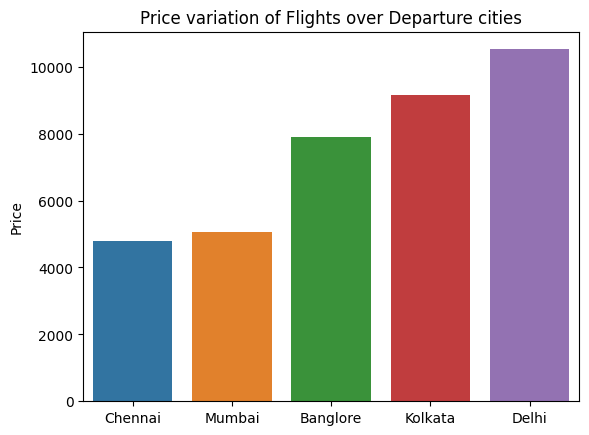

In [ ]:
source = list(df1.groupby('Source')['Price'].agg(np.mean).sort_values().index)
price=list(df1.groupby('Source')['Price'].agg(np.mean).sort_values().values)
sns.barplot(x = source,y = price)
plt.title("Price variation of Flights over Departure cities")
plt.ylabel("Price")
plt.show()

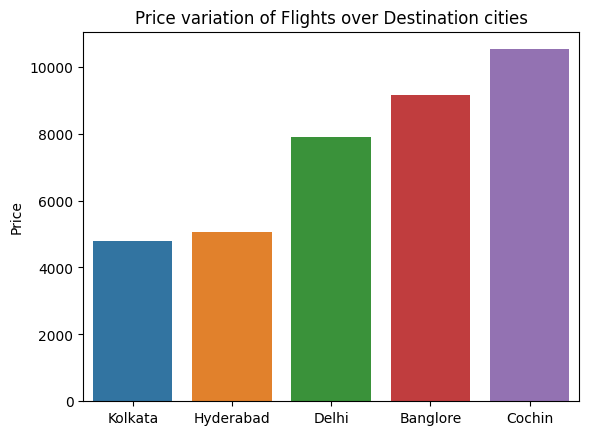

In [ ]:
Destination = list(df1.groupby('Destination')['Price'].agg(np.mean).sort_values().index)
price=list(df1.groupby('Destination')['Price'].agg(np.mean).sort_values().values)
sns.barplot(x = Destination,y = price)
plt.title("Price variation of Flights over Destination cities")
plt.ylabel("Price")
plt.show()

In [ ]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,hours,minutes,duration_mins,Day,Month
0,IndiGo,24/03/2019,Banglore,Delhi,2h 50m,non-stop,3897,2,50,170,24,3
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662,7,25,445,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882,19,0,1140,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218,5,25,325,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,4h 45m,1 stop,13302,4,45,285,1,3


In [ ]:
# visualizing the relationship between flight duration and prices

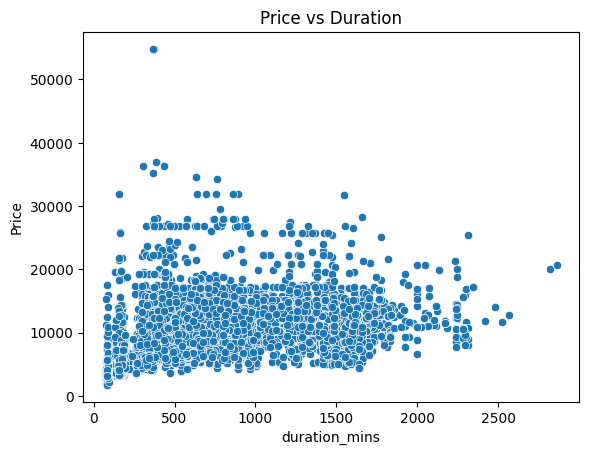

In [ ]:
sns.scatterplot(x = df1.duration_mins, y = df1.Price)
plt.title('Price vs Duration')
plt.show()

In [ ]:
# Visualizing the prices with the total_stops

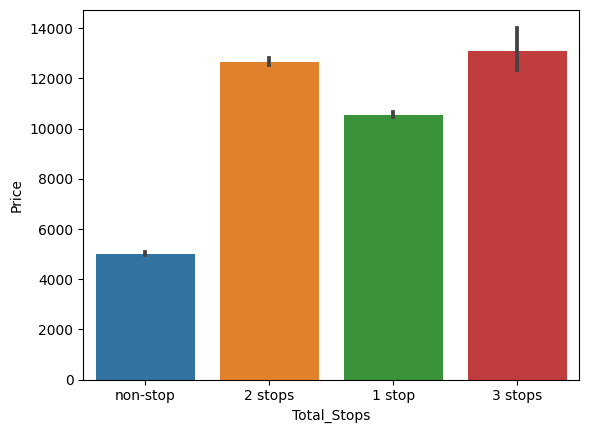

In [ ]:
sns.barplot(x=df1.Total_Stops,y=df1.Price)
plt.show()

In [ ]:
#Visualizing the prices variation with different air lines

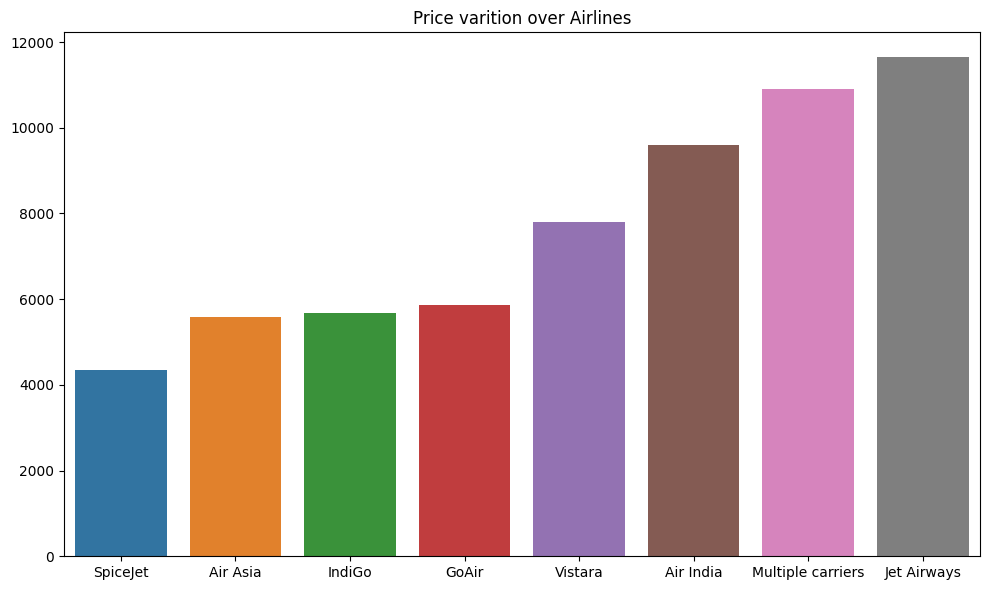

In [ ]:
plt.figure(figsize=(10,6))
airline = list(df1.groupby('Airline')['Price'].agg(np.mean).sort_values().index)
price = list(df1.groupby('Airline')['Price'].agg(np.mean).sort_values().values)
sns.barplot(x=airline,y=price)
plt.title("Price varition over Airlines")
plt.tight_layout()

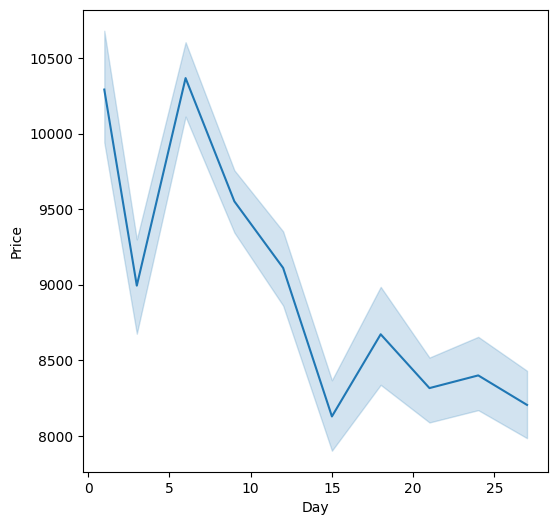

In [ ]:
plt.figure(figsize=(6,6))
sns.lineplot(x=df1.Day,y=df1.Price)
plt.show()

In [ ]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,hours,minutes,duration_mins,Day,Month
0,IndiGo,24/03/2019,Banglore,Delhi,2h 50m,non-stop,3897,2,50,170,24,3
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662,7,25,445,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882,19,0,1140,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218,5,25,325,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,4h 45m,1 stop,13302,4,45,285,1,3


In [ ]:
#Encoding the categorical data in each column to numerical labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
df1.Airline = encoder.fit_transform(df1.Airline)
df1.Source = encoder.fit_transform(df1.Source)
df1.Destination = encoder.fit_transform(df1.Destination)
df1.Total_Stops = encoder.fit_transform(df1.Total_Stops)

In [ ]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,hours,minutes,duration_mins,Day,Month
0,3,24/03/2019,0,2,2h 50m,3,3897,2,50,170,24,3
1,1,1/05/2019,3,0,7h 25m,1,7662,7,25,445,1,5
2,4,9/06/2019,2,1,19h,1,13882,19,0,1140,9,6
3,3,12/05/2019,3,0,5h 25m,0,6218,5,25,325,12,5
4,3,01/03/2019,0,2,4h 45m,0,13302,4,45,285,1,3


In [ ]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Duration',
       'Total_Stops', 'Price', 'hours', 'minutes', 'duration_mins', 'Day',
       'Month'],
      dtype='object')

In [ ]:
df2 = df1[['Airline','Source', 'Destination','Total_Stops','duration_mins','Day','Month','Price']]
df2.head()

,Airline,Source,Destination,Total_Stops,duration_mins,Day,Month,Price
0,3,0,2,3,170,24,3,3897
1,1,3,0,1,445,1,5,7662
2,4,2,1,1,1140,9,6,13882
3,3,3,0,0,325,12,5,6218
4,3,0,2,0,285,1,3,13302


In [ ]:
#Spliting the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df2.drop('Price',axis=1)
Y = df2['Price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=18)

In [ ]:
#Scaling the data to ensure that all features are on similar scales

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(x_train)
x_train_sc = pd.DataFrame(data=scaled_data,columns=X.columns)
x_train_sc.head()

,Airline,Source,Destination,Total_Stops,duration_mins,Day,Month
0,0.270783,0.884414,-1.161994,-0.845118,2.000940,0.536991,0.243874
1,0.270783,-1.654164,0.801239,1.374842,-0.908196,-0.172311,-0.613996
2,0.270783,0.884414,-1.161994,-0.845118,0.216013,-0.172311,0.243874
3,-2.088708,0.884414,-1.161994,1.374842,-0.957503,-0.526962,-1.471866
4,0.270783,0.884414,-1.161994,-0.845118,2.000940,-1.472698,-0.613996


In [ ]:
scaled_data = scaler.transform(x_test)
x_test_sc = pd.DataFrame(data=scaled_data,columns=X.columns)
x_test_sc.head()

,Airline,Source,Destination,Total_Stops,duration_mins,Day,Month
0,-0.319089,-0.807972,2.764472,1.374842,-0.987087,0.182340,1.101744
1,0.270783,-1.654164,0.801239,-0.845118,1.320498,0.536991,-1.471866
2,-0.319089,0.038221,-0.180377,-0.845118,-0.424983,-1.236264,1.101744
3,2.040402,-1.654164,0.801239,1.374842,-0.947642,0.536991,0.243874
4,0.270783,0.038221,-0.180377,-0.105131,1.448697,-1.472698,1.101744


In [ ]:
# Testing on Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [ ]:
model = LR.fit(x_train_sc,y_train)
y_pred = model.predict(x_test_sc)


In [ ]:
# Checking for r2_score and MAE

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
print("The R2 score of the Linear Regression is :",r2_score(y_test,y_pred))
print("The mean absolute score of the Linear Regression is : ",mean_absolute_error(y_test,y_pred))

The R2 score of the Linear Regression is : 0.4188821329506486
The mean absolute score of the Linear Regression is :  2459.372451024672


In [ ]:
# creating list for storing the model, r2_score and MAE

In [ ]:
mo = []
r = []
m = []
mo.append('Linear Regression')
r.append(r2_score(y_test,y_pred))
m.append(mean_absolute_error(y_test,y_pred))

In [ ]:
# Testing on RandomForest regressor model and Checking for r2_score and MAE and creating list for storing the model, r2_score and MAE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor()

In [ ]:
model = rfr.fit(x_train_sc,y_train)
y_pred_rfr = model.predict(x_test_sc)
print("The R2 score of the Random Forest Regression is :",r2_score(y_test,y_pred_rfr))
print("The mean absolute score of Random Forest Regression is : ",mean_absolute_error(y_test,y_pred_rfr))

The R2 score of the Random Forest Regression is : 0.7342211300683925
The mean absolute score of Random Forest Regression is :  1379.9699445731164


In [ ]:
mo.append('Random Forest Regression')
r.append(r2_score(y_test,y_pred_rfr))
m.append(mean_absolute_error(y_test,y_pred_rfr))

In [ ]:
# Testing on DecisionTree regressor model and Checking for r2_score and MAE and creating list for storing the model, r2_score and MAE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr =DecisionTreeRegressor()

In [ ]:
model = dtr.fit(x_train_sc,y_train)
y_pred_dtr = model.predict(x_test_sc)
print("The R2 score of the Decision Tree Regression is :",r2_score(y_test,y_pred_dtr))
print("The mean absolute score of Decision tree Regression is : ",mean_absolute_error(y_test,y_pred_dtr))

The R2 score of the Decision Tree Regression is : 0.5868740534918517
The mean absolute score of Decision tree Regression is :  1578.1236518901153


In [ ]:
mo.append('Decision Tree Regression')
r.append(r2_score(y_test,y_pred_dtr))
m.append(mean_absolute_error(y_test,y_pred_dtr))

In [ ]:
# Testing on Lasso and Ridge regression model and Checking for r2_score and MAE and creating list for storing the model, r2_score and MAE

In [ ]:
from sklearn.linear_model import Lasso,Ridge
l = Lasso()
ri = Ridge()

In [ ]:
model = l.fit(x_train_sc,y_train)
y_pred_l = model.predict(x_test_sc)
print("The R2 score of the Lasso Regression is :",r2_score(y_test,y_pred_l))
print("The mean absolute score of Lasso Regression is : ",mean_absolute_error(y_test,y_pred_l))

The R2 score of the Lasso Regression is : 0.4189209174838989
The mean absolute score of Lasso Regression is :  2459.2309845563286


In [ ]:
mo.append('Lasso Regression')
r.append(r2_score(y_test,y_pred_l))
m.append(mean_absolute_error(y_test,y_pred_l))

In [ ]:
model = ri.fit(x_train_sc,y_train)
y_pred_R = model.predict(x_test_sc)
print("The R2 score of the Ridge Regression is :",r2_score(y_test,y_pred_R))
print("The mean absolute score of Ridge Regression is : ",mean_absolute_error(y_test,y_pred_R))

The R2 score of the Ridge Regression is : 0.41888535855233033
The mean absolute score of Ridge Regression is :  2459.3629303518724


In [ ]:
mo.append('Ridge Regression')
r.append(r2_score(y_test,y_pred_R))
m.append(mean_absolute_error(y_test,y_pred_R))

In [ ]:
# Checking all the models r2_score and MAE

In [ ]:
scores_df = pd.DataFrame({'model':mo,'R2 score':r,'Mean absolute error':m})
scores_df = scores_df.sort_values('R2 score',ascending = False)
scores_df

,model,R2 score,Mean absolute error
1,Random Forest Regression,0.734221,1379.969945
2,Decision Tree Regression,0.586874,1578.123652
3,Lasso Regression,0.418921,2459.230985
4,Ridge Regression,0.418885,2459.362930
0,Linear Regression,0.418882,2459.372451


In [ ]:
# Comparing the R2 scores of all models

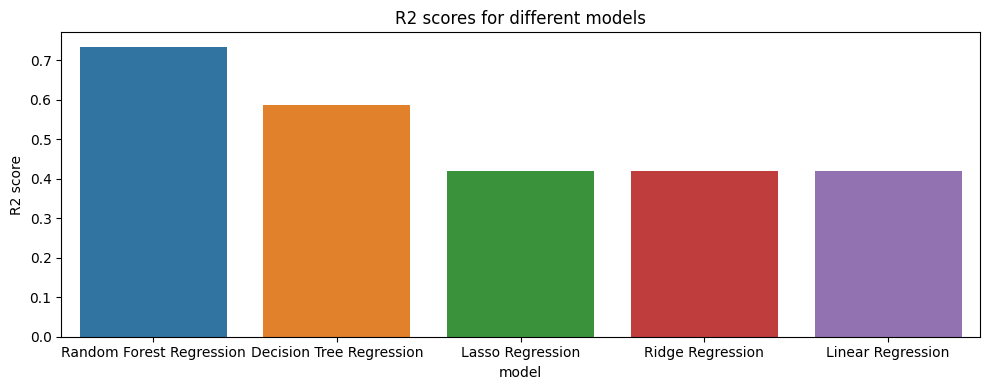

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=scores_df.model,y=scores_df['R2 score'])
plt.title('R2 scores for different models')
plt.tight_layout()

In [ ]:
# Comparing the MAE of all models

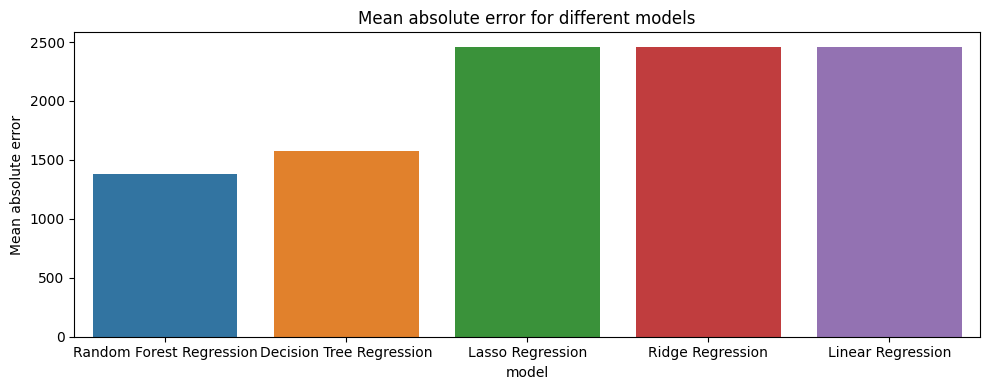

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=scores_df.model,y=scores_df['Mean absolute error'])
plt.title('Mean absolute error for different models')
plt.tight_layout()